In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import imutils.paths as path
from tqdm import tqdm
import os
from skimage.io import imread
import cv2
from tqdm import tqdm

In [2]:
import tensorflow as tf
from keras.models import Model, Sequential
from keras.layers import Input, Activation, Dense, Conv2D, MaxPooling2D, ZeroPadding2D, Flatten
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [3]:
positifList=os.listdir('brain_tumor_dataset/yes/')
negatifList=os.listdir('brain_tumor_dataset/no/')

In [4]:
def loadCitra (listData, labeling):
    data = []
    label = []
    for i in tqdm (listData):
        if (labeling == 0):
            sample = cv2.imread ('brain_tumor_dataset/yes/'+i)
        elif (labeling == 1):
            sample = cv2.imread ('brain_tumor_dataset/no/'+i)
        sampleResize= cv2.resize (sample, (32,32) )
        (b, g, r)=cv2.split(sampleResize) 
        sample2=cv2.merge([r,g,b])
        data.append(sample2)
        label.append(labeling)
    return (data, label)

In [5]:
citraPositif, IDpositif=loadCitra(positifList, 0)
citraArray = np.array (citraPositif)
print (IDpositif)
print (citraArray.shape)
print("panjang IDpositif:" + str(len(IDpositif))+"\n")

citraNegatif, IDnegatif=loadCitra(negatifList, 1)
citraArray = np.array (citraPositif)
print (IDnegatif)
print (citraArray.shape)
print("panjang IDnegatif: " + str(len(IDnegatif))+"\n")

citra = citraPositif+citraNegatif
ex=np.array (citra)
print (ex.shape)
ID=IDpositif+IDnegatif
print("Jumlah Citra: " + str(len(citra)))
print("panjang ID: " + str(len(ID)))

100%|██████████| 155/155 [00:01<00:00, 136.92it/s]


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
(155, 32, 32, 3)
panjang IDpositif:155



100%|██████████| 98/98 [00:00<00:00, 167.33it/s]


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
(155, 32, 32, 3)
panjang IDnegatif: 98

(253, 32, 32, 3)
Jumlah Citra: 253
panjang ID: 253


In [6]:
ID=np.array(ID)

print (ID)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [7]:
# normalisasi data
citra = np.squeeze(citra)
citra = citra.astype('float32')
citra /= 255

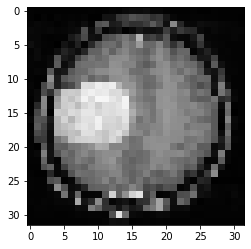

In [8]:
plt.imshow(citra[0])

In [ ]:
x_train, x_test, l_train, l_test =  train_test_split(citra, ID, stratify=ID, test_size=0.3, random_state=5)
y_train=to_categorical(l_train) 
y_test= to_categorical(l_test)

print(x_test.shape)
print(l_test.shape)
print(y_test.shape) 

In [ ]:
# 4.1 Feature Extraction Layer 
inputs = Input(shape=(32, 32, 3))
conv_layer = ZeroPadding2D(padding=(2,2))(inputs)
conv_layer = Conv2D(32, (3, 3), strides=(1,1), activation='relu')(conv_layer)
conv_layer = MaxPooling2D((2, 2))(conv_layer)
conv_layer = Conv2D(64, (3, 3), strides=(1,1), activation='relu')(conv_layer)
conv_layer = MaxPooling2D((2, 2))(conv_layer)
conv_layer = Conv2D(128, (3, 3), strides=(1,1), activation='relu')(conv_layer)

# 4.2 Flatten feature map to Vector with 576 element.
flatten = Flatten()(conv_layer)

# 4.3 Fully Connected Layer (classification layer)
fc_layer = Dense(128, activation='relu')(flatten)
fc_layer = Dense(64, activation='relu')(fc_layer)
outputs = Dense(2, activation='softmax')(fc_layer)

modelFaceRec = Model(inputs=inputs, outputs=outputs)

In [ ]:
# 4.4 Gunakan Adam Optimizer and categorical_crossentropy loss evaluation

modelFaceRec.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])
#model1.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

# 4.5 Print Model Summary
print(modelFaceRec.summary())

In [ ]:
# Train for 100 Epochs and use TensorBoard Callback
history=modelFaceRec.fit(x_train, y_train, epochs=250, verbose=0, validation_data=(x_test, y_test))

# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

test_loss, test_acc = modelFaceRec.evaluate(x_train, y_train)

print('Trainning accuracy:', test_acc)

test_loss, test_acc = modelFaceRec.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)

In [11]:
(x_train, y_train), (x_test, y_test) = (citra[:190],ID[:190]) , (citra[190:] , ID[190:])
(x_valid , y_valid) = (x_test[:63], y_test[:63])

In [12]:
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=9, padding='same', activation='relu', input_shape=(32,32,3))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.45))

model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=9,padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(filters=36, kernel_size=9, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.15))


model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Take a look at the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        3904      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 16)        20752     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 36)          4

In [13]:
model.compile(loss='binary_crossentropy',
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['acc'])

In [14]:
model.fit(x_train,
         y_train,
         batch_size=128,
         epochs=150,
         validation_data=(x_valid, y_valid),)

Epoch 1/150
2/2 [==============================] - ETA: 0s - loss: 0.7615 - acc: 0.203 - ETA: 0s - loss: 0.6624 - acc: 0.405 - 1s 448ms/step - loss: 0.6624 - acc: 0.4053 - val_loss: 2.0167 - val_acc: 0.0000e+00
Epoch 2/150
2/2 [==============================] - ETA: 0s - loss: 0.7782 - acc: 0.781 - ETA: 0s - loss: 0.6327 - acc: 0.815 - 0s 180ms/step - loss: 0.6327 - acc: 0.8158 - val_loss: 1.0038 - val_acc: 0.0000e+00
Epoch 3/150
2/2 [==============================] - ETA: 0s - loss: 0.4548 - acc: 0.828 - ETA: 0s - loss: 0.4713 - acc: 0.815 - 0s 172ms/step - loss: 0.4713 - acc: 0.8158 - val_loss: 0.9105 - val_acc: 0.0000e+00
Epoch 4/150
2/2 [==============================] - ETA: 0s - loss: 0.4788 - acc: 0.835 - ETA: 0s - loss: 0.4955 - acc: 0.815 - 0s 190ms/step - loss: 0.4955 - acc: 0.8158 - val_loss: 1.0082 - val_acc: 0.0000e+00
Epoch 5/150
2/2 [==============================] - ETA: 0s - loss: 0.4636 - acc: 0.820 - ETA: 0s - loss: 0.4642 - acc: 0.815 - 0s 196ms/step - loss: 0.4642 

In [15]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.6666666865348816
